# Unique Value Classification

In [1]:
import mapclassify
import numpy
import libpysal
import geopandas
import distinctipy
import matplotlib.patches as mpatches
import pandas

mapclassify.__version__

'2.5.0'

In [160]:

gdf = geopandas.read_file(libpysal.examples.get_path('south.shp'))

In [161]:
gdf.columns

Index(['NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'STFIPS',
       'COFIPS', 'FIPSNO', 'SOUTH', 'HR60', 'HR70', 'HR80', 'HR90', 'HC60',
       'HC70', 'HC80', 'HC90', 'PO60', 'PO70', 'PO80', 'PO90', 'RD60', 'RD70',
       'RD80', 'RD90', 'PS60', 'PS70', 'PS80', 'PS90', 'UE60', 'UE70', 'UE80',
       'UE90', 'DV60', 'DV70', 'DV80', 'DV90', 'MA60', 'MA70', 'MA80', 'MA90',
       'POL60', 'POL70', 'POL80', 'POL90', 'DNL60', 'DNL70', 'DNL80', 'DNL90',
       'MFIL59', 'MFIL69', 'MFIL79', 'MFIL89', 'FP59', 'FP69', 'FP79', 'FP89',
       'BLK60', 'BLK70', 'BLK80', 'BLK90', 'GI59', 'GI69', 'GI79', 'GI89',
       'FH60', 'FH70', 'FH80', 'FH90', 'geometry'],
      dtype='object')

In [162]:
def unique_value_choropleth(gdf, column, figsize=(16, 9),
                           fontsize=17):
    counts = numpy.unique(gdf[column], return_counts=True)
    values = gdf[column].values
    colors = distinctipy.get_colors(len(counts[0]))
    df = pandas.DataFrame(data = {'label': counts[0], 'counts': counts[1],
                                  'color': colors})
    colors = [colors[numpy.where(counts[0]==i)[0][0]] for i in values]
    gdf.plot(color=colors, figsize=figsize)
    patch_list = []
    w = len(str(df.counts.max()))
    for index, row in df.iterrows():   
        entry = f'{row["counts"]:>{w}} {row["label"]}'
        entries.append(entry)
        legend_dict[entry] = row['color']
        data_key = mpatches.Patch(color=row['color'], label=entry)
        patch_list.append(data_key)

    plt.legend(handles=patch_list, bbox_to_anchor=(1.7, 1),loc='upper right',
              fontsize=fontsize);
    plt.axis('off');

    

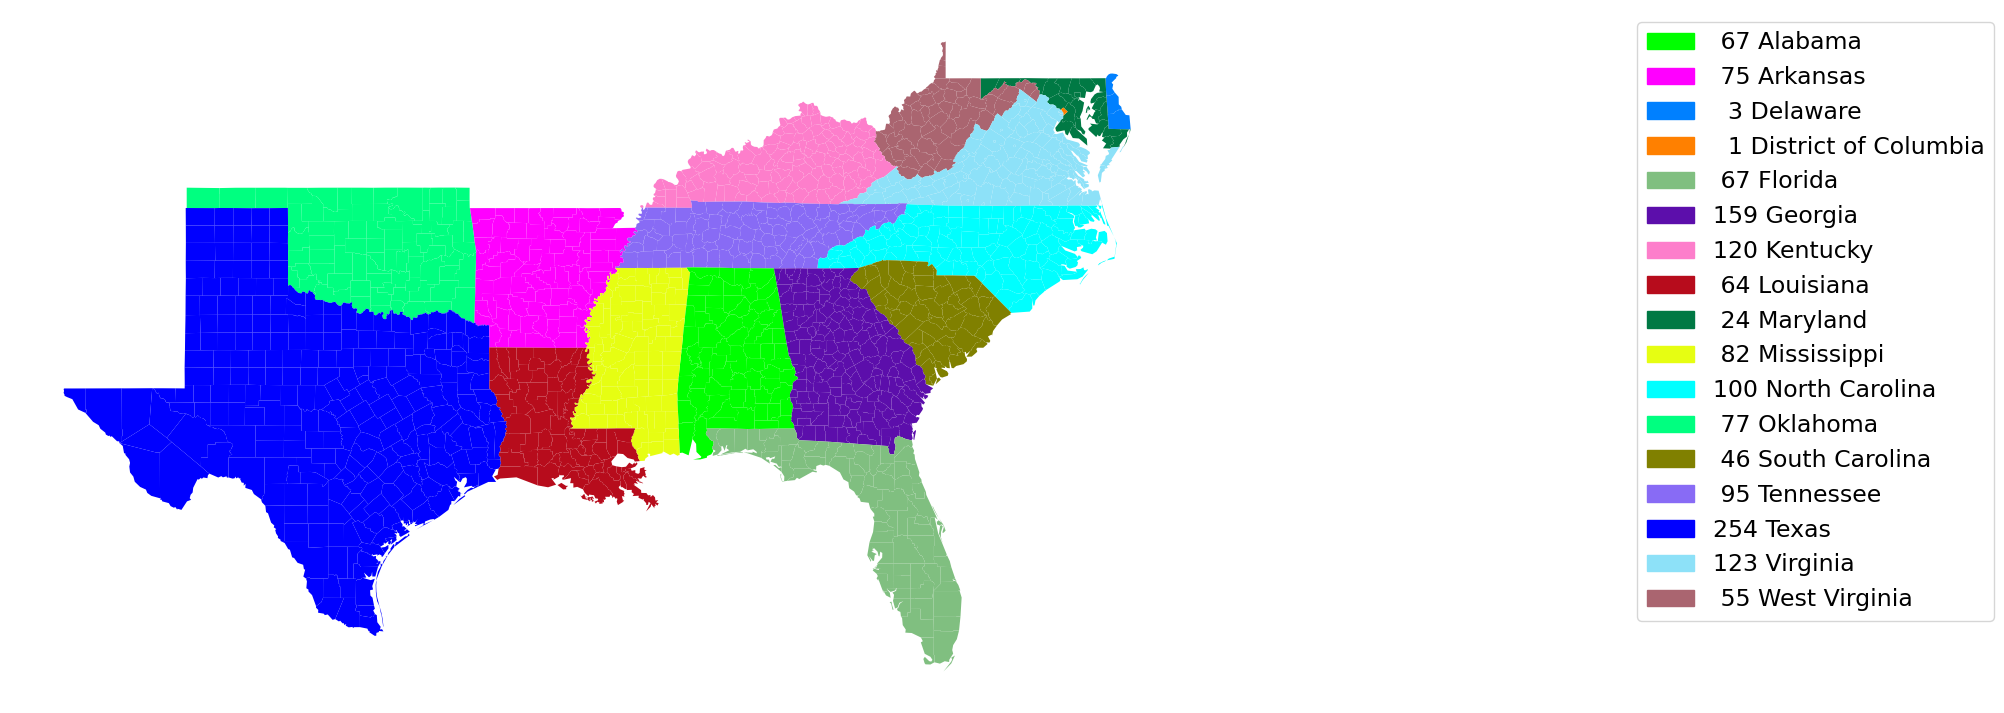

In [163]:
unique_value_choropleth(gdf, 'STATE_NAME')

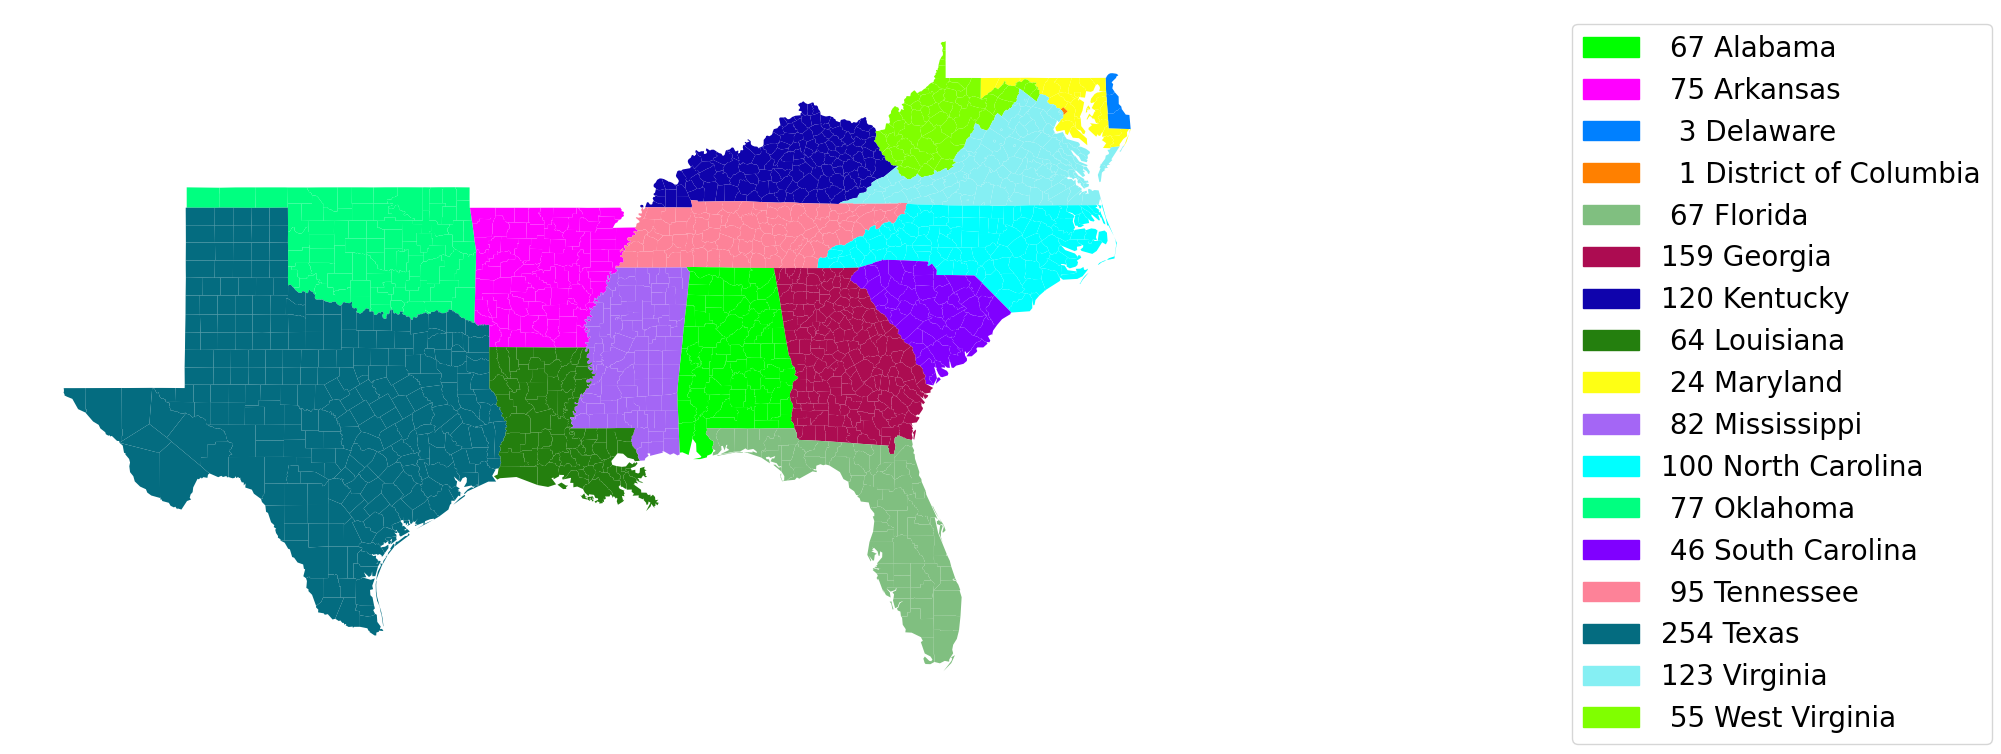

In [164]:
unique_value_choropleth(gdf, 'STATE_NAME', fontsize=20)

In [158]:
us = geopandas.read_file("/home/serge/Downloads/cb_2018_us_county_20m.shp")
us = us[us.STATEFP!='02']
us = us[us.STATEFP!='15']

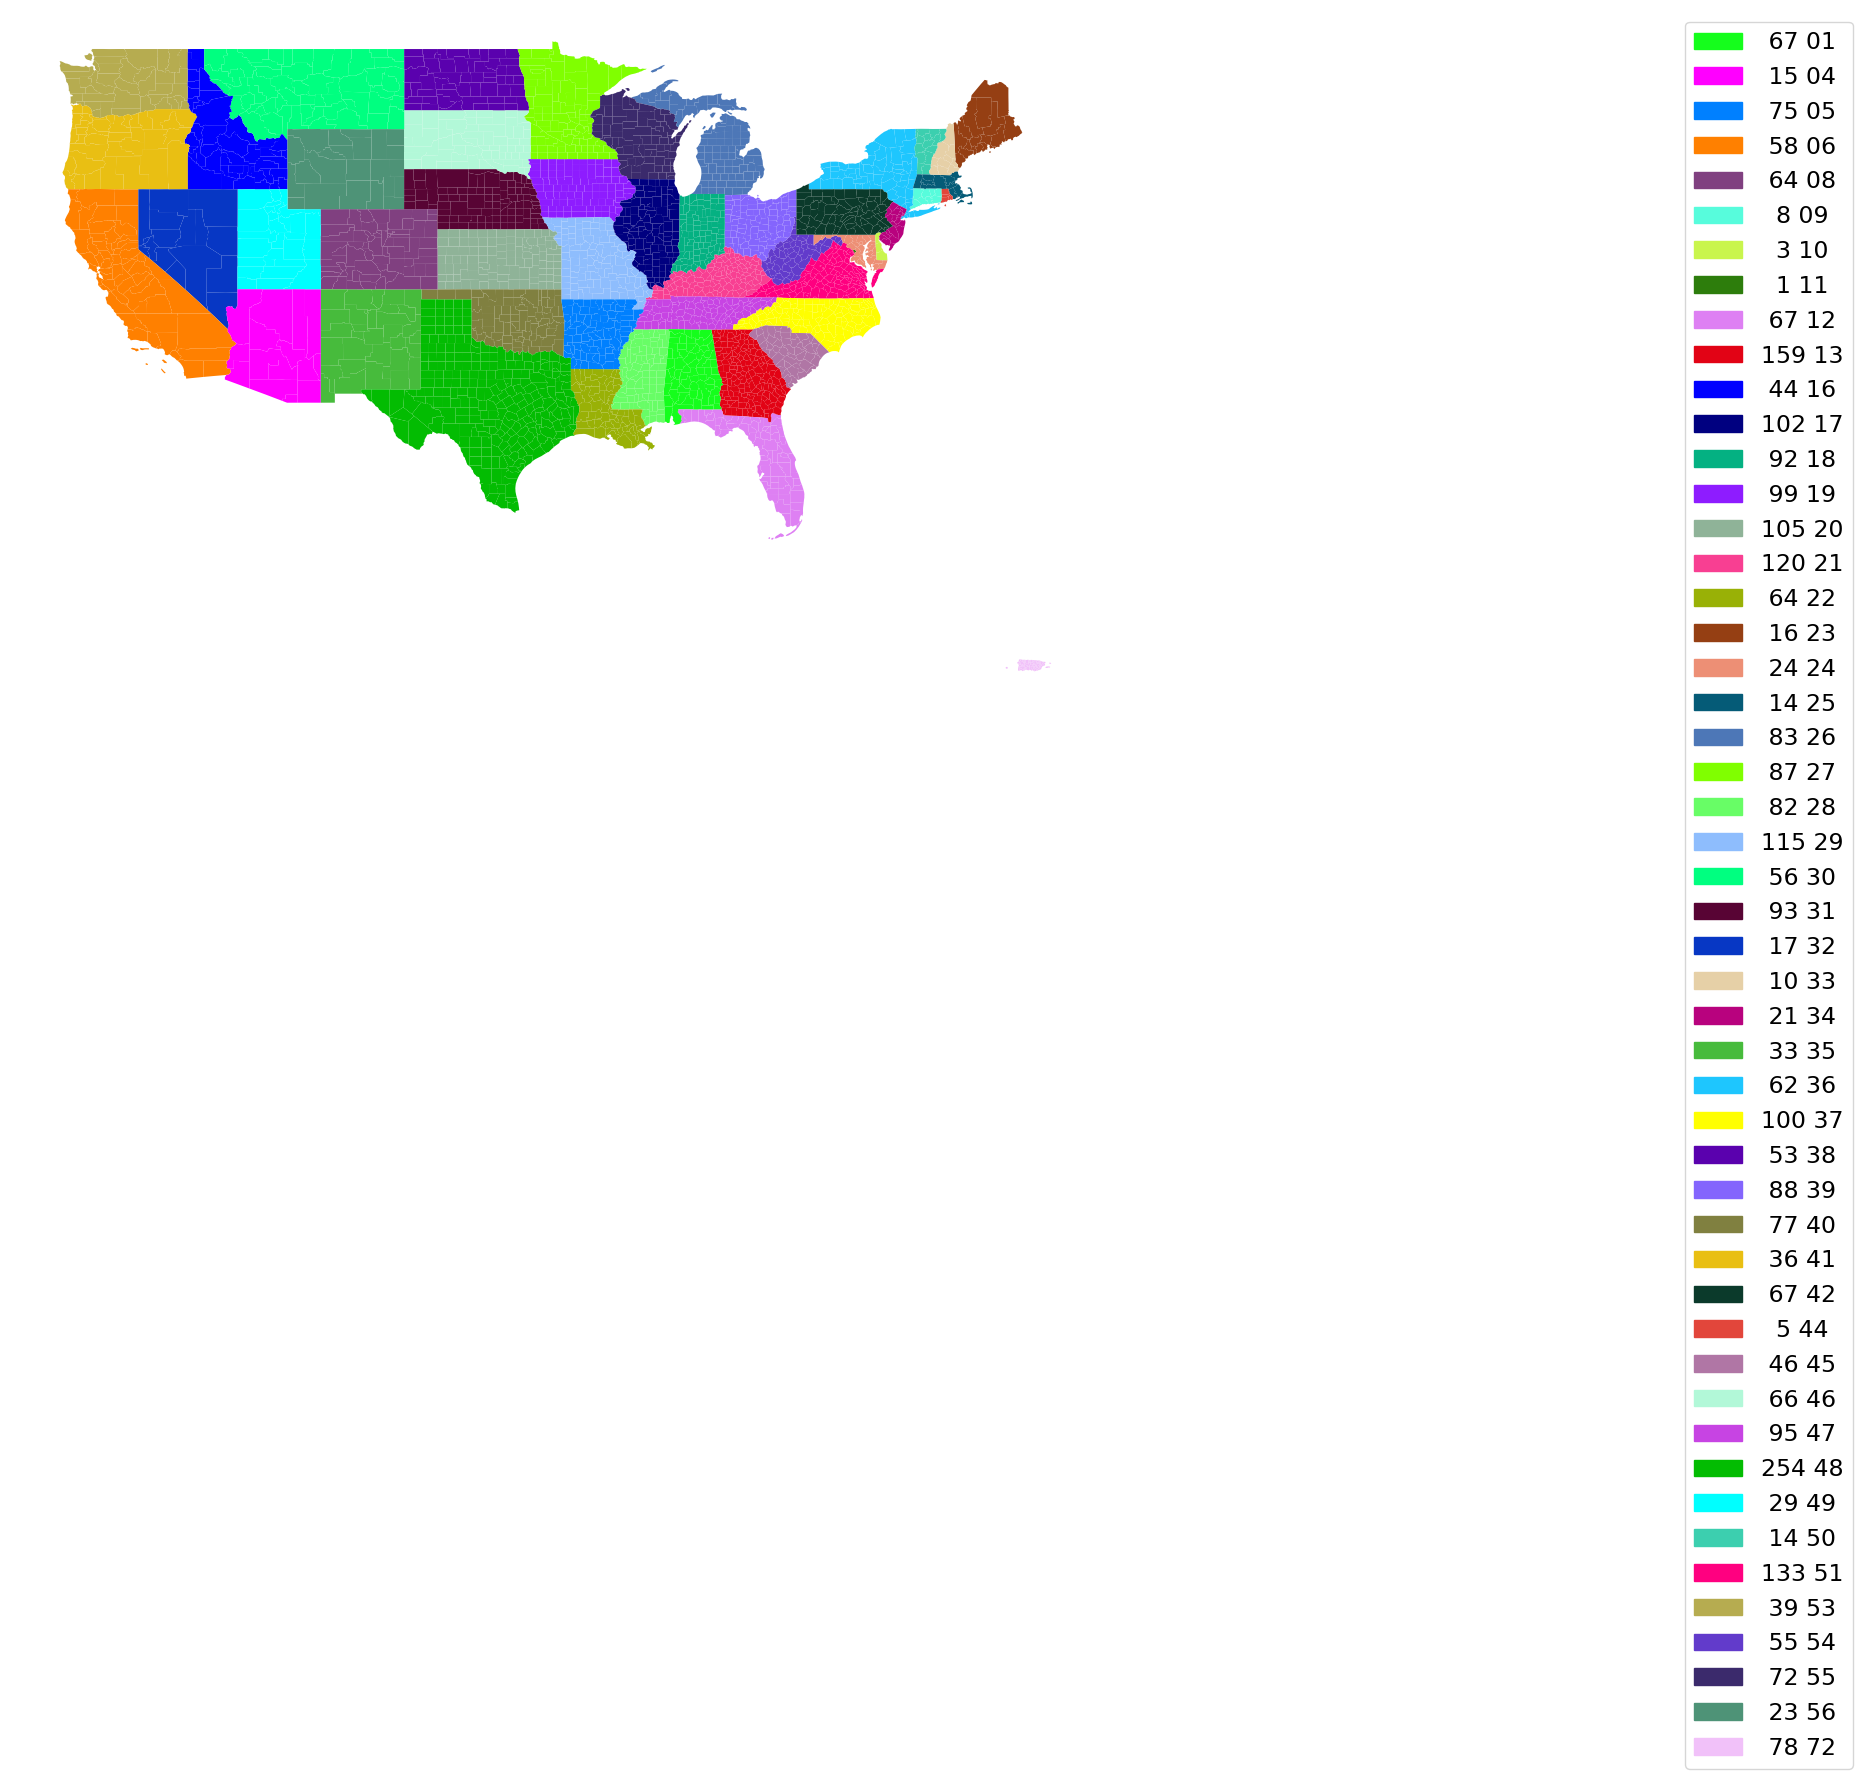

In [159]:
unique_value_choropleth(us, 'STATEFP')

In [144]:
us.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."


In [116]:
gdf.columns

Index(['NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'STFIPS',
       'COFIPS', 'FIPSNO', 'SOUTH', 'HR60', 'HR70', 'HR80', 'HR90', 'HC60',
       'HC70', 'HC80', 'HC90', 'PO60', 'PO70', 'PO80', 'PO90', 'RD60', 'RD70',
       'RD80', 'RD90', 'PS60', 'PS70', 'PS80', 'PS90', 'UE60', 'UE70', 'UE80',
       'UE90', 'DV60', 'DV70', 'DV80', 'DV90', 'MA60', 'MA70', 'MA80', 'MA90',
       'POL60', 'POL70', 'POL80', 'POL90', 'DNL60', 'DNL70', 'DNL80', 'DNL90',
       'MFIL59', 'MFIL69', 'MFIL79', 'MFIL89', 'FP59', 'FP69', 'FP79', 'FP89',
       'BLK60', 'BLK70', 'BLK80', 'BLK90', 'GI59', 'GI69', 'GI79', 'GI89',
       'FH60', 'FH70', 'FH80', 'FH90', 'geometry'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots()
cm = plt.get_cmap('gist_rainbow')
 for count, col in enumerate(df.columns):
    ax.plot(df[col], label = col, linewidth = 2, color = cm(count*20))



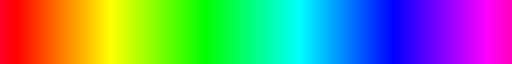

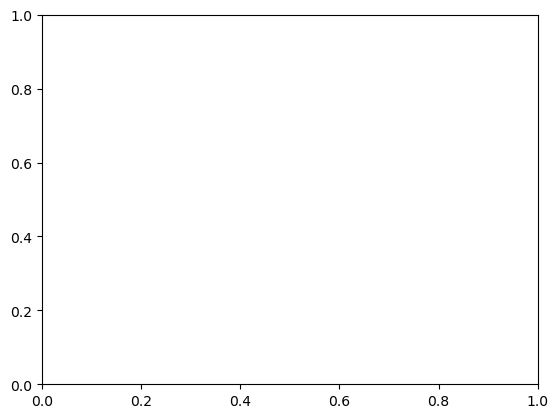

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
cm = plt.get_cmap('gist_rainbow')
nc = 40
colors = [cm(i * nc) for i in range(nc)]

#for count, col in enumerate(df.columns):
#    ax.plot(df[col], label = col, linewidth = 2, color = cm(count*20))

cm

In [61]:
colors

[(1.0, 0.0, 0.16, 1.0),
 (1.0, 0.6857445680975094, 0.0, 1.0),
 (0.4663487016428193, 1.0, 0.0, 1.0),
 (0.0, 1.0, 0.3795066413662241, 1.0),
 (0.0, 0.774722932651321, 1.0, 1.0),
 (0.07779198635976144, 0.0, 1.0, 1.0),
 (0.9303069053708444, 0.0, 1.0, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.

## Sample Data
We construct a synthetic dataset composed of 20 cross-sectional units at three time points. Here the mean of the series is increasing over time.

In [2]:
n = 20
data = numpy.array([numpy.arange(n) + i * n for i in range(1, 4)]).T
data.shape

(20, 3)

In [3]:
data

array([[20, 40, 60],
       [21, 41, 61],
       [22, 42, 62],
       [23, 43, 63],
       [24, 44, 64],
       [25, 45, 65],
       [26, 46, 66],
       [27, 47, 67],
       [28, 48, 68],
       [29, 49, 69],
       [30, 50, 70],
       [31, 51, 71],
       [32, 52, 72],
       [33, 53, 73],
       [34, 54, 74],
       [35, 55, 75],
       [36, 56, 76],
       [37, 57, 77],
       [38, 58, 78],
       [39, 59, 79]])

## Default: Quintiles
The default is to apply a [vec](https://en.wikipedia.org/wiki/Vectorization_(mathematics)) operator to the data matrix and treat the observations as a single collection. Here the quantiles of the pooled data are obtained.

In [4]:
res = mapclassify.Pooled(data)
res

Pooled Classifier

Pooled Quantiles

   Interval      Count
----------------------
[20.00, 31.80] |    12
(31.80, 43.60] |     8
(43.60, 55.40] |     0
(55.40, 67.20] |     0
(67.20, 79.00] |     0

Pooled Quantiles

   Interval      Count
----------------------
[20.00, 31.80] |     0
(31.80, 43.60] |     4
(43.60, 55.40] |    12
(55.40, 67.20] |     4
(67.20, 79.00] |     0

Pooled Quantiles

   Interval      Count
----------------------
[20.00, 31.80] |     0
(31.80, 43.60] |     0
(43.60, 55.40] |     0
(55.40, 67.20] |     8
(67.20, 79.00] |    12

Note that the class definitions are constant across the periods.

In [5]:
res = mapclassify.Pooled(data, k=4)

In [6]:
res.col_classifiers[0].counts

array([15,  5,  0,  0])

In [7]:
res.col_classifiers[-1].counts

array([ 0,  0,  5, 15])

In [8]:
res.global_classifier.counts

array([15, 15, 15, 15])

In [9]:
res

Pooled Classifier

Pooled Quantiles

   Interval      Count
----------------------
[20.00, 34.75] |    15
(34.75, 49.50] |     5
(49.50, 64.25] |     0
(64.25, 79.00] |     0

Pooled Quantiles

   Interval      Count
----------------------
[20.00, 34.75] |     0
(34.75, 49.50] |    10
(49.50, 64.25] |    10
(64.25, 79.00] |     0

Pooled Quantiles

   Interval      Count
----------------------
[20.00, 34.75] |     0
(34.75, 49.50] |     0
(49.50, 64.25] |     5
(64.25, 79.00] |    15

Extract the pooled classification objects for each column.

In [10]:
c0, c1, c2 = res.col_classifiers
c0

Pooled Quantiles

   Interval      Count
----------------------
[20.00, 34.75] |    15
(34.75, 49.50] |     5
(49.50, 64.25] |     0
(64.25, 79.00] |     0

Compare to the unrestricted classifier for the first column...

In [11]:
mapclassify.Quantiles(c0.y, k=4)

Quantiles

   Interval      Count
----------------------
[20.00, 24.75] |     5
(24.75, 29.50] |     5
(29.50, 34.25] |     5
(34.25, 39.00] |     5

... and the last column comparisions.

In [12]:
c2

Pooled Quantiles

   Interval      Count
----------------------
[20.00, 34.75] |     0
(34.75, 49.50] |     0
(49.50, 64.25] |     5
(64.25, 79.00] |    15

In [13]:
mapclassify.Quantiles(c2.y, k=4)

Quantiles

   Interval      Count
----------------------
[60.00, 64.75] |     5
(64.75, 69.50] |     5
(69.50, 74.25] |     5
(74.25, 79.00] |     5

## Non-default classifier: BoxPlot

In [14]:
res = mapclassify.Pooled(data, classifier="BoxPlot", hinge=1.5)
res

Pooled Classifier

Pooled BoxPlot

    Interval       Count
------------------------
(  -inf,  -9.50] |     0
( -9.50,  34.75] |    15
( 34.75,  49.50] |     5
( 49.50,  64.25] |     0
( 64.25, 108.50] |     0

Pooled BoxPlot

    Interval       Count
------------------------
(  -inf,  -9.50] |     0
( -9.50,  34.75] |     0
( 34.75,  49.50] |    10
( 49.50,  64.25] |    10
( 64.25, 108.50] |     0

Pooled BoxPlot

    Interval       Count
------------------------
(  -inf,  -9.50] |     0
( -9.50,  34.75] |     0
( 34.75,  49.50] |     0
( 49.50,  64.25] |     5
( 64.25, 108.50] |    15

In [15]:
res.col_classifiers[0].bins

array([ -9.5 ,  34.75,  49.5 ,  64.25, 108.5 ])

In [16]:
c0, c1, c2 = res.col_classifiers

In [17]:
c0.yb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [18]:
c00 = mapclassify.BoxPlot(c0.y, hinge=3)

In [19]:
c00.yb

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4])

In [20]:
c00

BoxPlot

   Interval      Count
----------------------
( -inf, -3.75] |     0
(-3.75, 24.75] |     5
(24.75, 29.50] |     5
(29.50, 34.25] |     5
(34.25, 62.75] |     5

In [21]:
c0

Pooled BoxPlot

    Interval       Count
------------------------
(  -inf,  -9.50] |     0
( -9.50,  34.75] |    15
( 34.75,  49.50] |     5
( 49.50,  64.25] |     0
( 64.25, 108.50] |     0

## Non-default classifier: FisherJenks

In [22]:
res = mapclassify.Pooled(data, classifier="FisherJenks", k=5)
res

/home/serge/anaconda3/envs/mapclassify/lib/python3.10/site-packages/mapclassify/classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


Pooled Classifier

Pooled FisherJenks

   Interval      Count
----------------------
[20.00, 31.00] |    12
(31.00, 43.00] |     8
(43.00, 55.00] |     0
(55.00, 67.00] |     0
(67.00, 79.00] |     0

Pooled FisherJenks

   Interval      Count
----------------------
[20.00, 31.00] |     0
(31.00, 43.00] |     4
(43.00, 55.00] |    12
(55.00, 67.00] |     4
(67.00, 79.00] |     0

Pooled FisherJenks

   Interval      Count
----------------------
[20.00, 31.00] |     0
(31.00, 43.00] |     0
(43.00, 55.00] |     0
(55.00, 67.00] |     8
(67.00, 79.00] |    12

In [23]:
c0, c1, c2 = res.col_classifiers
mapclassify.FisherJenks(c0.y, k=5)

FisherJenks

   Interval      Count
----------------------
[20.00, 23.00] |     4
(23.00, 27.00] |     4
(27.00, 31.00] |     4
(31.00, 35.00] |     4
(35.00, 39.00] |     4

## Non-default classifier: MaximumBreaks



In [24]:
data[1, 0] = 10
data[1, 1] = 10
data[1, 2] = 10
data[9, 2] = 10
data

array([[20, 40, 60],
       [10, 10, 10],
       [22, 42, 62],
       [23, 43, 63],
       [24, 44, 64],
       [25, 45, 65],
       [26, 46, 66],
       [27, 47, 67],
       [28, 48, 68],
       [29, 49, 10],
       [30, 50, 70],
       [31, 51, 71],
       [32, 52, 72],
       [33, 53, 73],
       [34, 54, 74],
       [35, 55, 75],
       [36, 56, 76],
       [37, 57, 77],
       [38, 58, 78],
       [39, 59, 79]])

In [25]:
res = mapclassify.Pooled(data, classifier="MaximumBreaks", k=5)
res

Pooled Classifier

Pooled MaximumBreaks

   Interval      Count
----------------------
[10.00, 15.00] |     1
(15.00, 21.00] |     1
(21.00, 41.00] |    18
(41.00, 61.00] |     0
(61.00, 79.00] |     0

Pooled MaximumBreaks

   Interval      Count
----------------------
[10.00, 15.00] |     1
(15.00, 21.00] |     0
(21.00, 41.00] |     1
(41.00, 61.00] |    18
(61.00, 79.00] |     0

Pooled MaximumBreaks

   Interval      Count
----------------------
[10.00, 15.00] |     2
(15.00, 21.00] |     0
(21.00, 41.00] |     0
(41.00, 61.00] |     1
(61.00, 79.00] |    17

In [26]:
c0, c1, c2 = res.col_classifiers
c0

Pooled MaximumBreaks

   Interval      Count
----------------------
[10.00, 15.00] |     1
(15.00, 21.00] |     1
(21.00, 41.00] |    18
(41.00, 61.00] |     0
(61.00, 79.00] |     0

In [27]:
c0.y

array([20, 10, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])

In [28]:
import warnings

In [29]:
with warnings.catch_warnings():
    warnings.filterwarnings("error")
    try:
        mapclassify.MaximumBreaks(c0.y, k=5)
    except UserWarning as e:
        print(e)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            mapclassify.MaximumBreaks(c0.y, k=5)

Insufficient number of unique diffs. Breaks are random.


In [30]:
res = mapclassify.Pooled(
    data, classifier="UserDefined", bins=mapclassify.Quantiles(data[:, -1]).bins
)
res

Pooled Classifier

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 62.80] |    20
(62.80, 66.60] |     0
(66.60, 71.40] |     0
(71.40, 75.20] |     0
(75.20, 79.00] |     0

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 62.80] |    20
(62.80, 66.60] |     0
(66.60, 71.40] |     0
(71.40, 75.20] |     0
(75.20, 79.00] |     0

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 62.80] |     4
(62.80, 66.60] |     4
(66.60, 71.40] |     4
(71.40, 75.20] |     4
(75.20, 79.00] |     4

In [31]:
mapclassify.Quantiles(data[:, -1])

Quantiles

   Interval      Count
----------------------
[10.00, 62.80] |     4
(62.80, 66.60] |     4
(66.60, 71.40] |     4
(71.40, 75.20] |     4
(75.20, 79.00] |     4

In [32]:
data[:, -1]

array([60, 10, 62, 63, 64, 65, 66, 67, 68, 10, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79])

## Pinning the pooling

Another option is to specify a specific subperiod as the definition for the classes in the pooling.

### Pinning to the last period

As an example, we can use the quintles from the third period to defined the pooled classifier:

In [33]:
pinned = mapclassify.Pooled(
    data, classifier="UserDefined", bins=mapclassify.Quantiles(data[:, -1]).bins
)
pinned

Pooled Classifier

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 62.80] |    20
(62.80, 66.60] |     0
(66.60, 71.40] |     0
(71.40, 75.20] |     0
(75.20, 79.00] |     0

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 62.80] |    20
(62.80, 66.60] |     0
(66.60, 71.40] |     0
(71.40, 75.20] |     0
(75.20, 79.00] |     0

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 62.80] |     4
(62.80, 66.60] |     4
(66.60, 71.40] |     4
(71.40, 75.20] |     4
(75.20, 79.00] |     4

In [34]:
pinned.global_classifier

UserDefined

   Interval      Count
----------------------
[10.00, 62.80] |    44
(62.80, 66.60] |     4
(66.60, 71.40] |     4
(71.40, 75.20] |     4
(75.20, 79.00] |     4

### Pinning to the first period

In [35]:
pinned = mapclassify.Pooled(
    data, classifier="UserDefined", bins=mapclassify.Quantiles(data[:, 0]).bins
)
pinned

Pooled Classifier

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 23.80] |     4
(23.80, 27.60] |     4
(27.60, 31.40] |     4
(31.40, 35.20] |     4
(35.20, 39.00] |     4
(39.00, 79.00] |     0

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 23.80] |     1
(23.80, 27.60] |     0
(27.60, 31.40] |     0
(31.40, 35.20] |     0
(35.20, 39.00] |     0
(39.00, 79.00] |    19

Pooled UserDefined

   Interval      Count
----------------------
[10.00, 23.80] |     2
(23.80, 27.60] |     0
(27.60, 31.40] |     0
(31.40, 35.20] |     0
(35.20, 39.00] |     0
(39.00, 79.00] |    18

Note that the quintiles for the first period, by definition, contain all the values from that period, they do not bound the larger values in subsequent periods. Following the [mapclassify policy](https://github.com/pysal/mapclassify/blob/a7770fb98bf945dad3c62ccf2c0f8b53abb1774a/mapclassify/classifiers.py#L589), an additional class is added to contain all values in the pooled series.